# Introduction:

**Mental health issues among university students have been a growing concern worldwide. The transition to university life, coupled with academic pressures and personal changes, can lead to the development of mental health problems such as depression, anxiety, and panic attacks. Early identification of students who are likely to face these issues can lead to timely intervention and support, potentially mitigating adverse effects on their academic performance and overall well-being.**

**In this context, the application of machine learning techniques can be a game-changer. By leveraging the power of predictive modeling, we can identify students who are at risk of developing mental health issues based on their demographic and academic characteristics. This article aims to define the problem and propose a roadmap for building such a predictive model.**

# Problem Definition:

**The problem at hand is to predict whether a university student is likely to have mental health issues based on their demographic and academic characteristics. The dataset we will be using for this project was collected through a survey conducted via Google forms from university students. The survey aimed to examine their current academic situation and mental health status.**

**The dataset includes the following features:**

1. **Timestamp**
1. **Gender**
1. **Age**
1. **Course of study**
1. **Current year of study**
1. **Cumulative Grade Point Average (CGPA)**
1. **Marital status**
1. **Depression status**
1. **Anxiety status**
1. **Panic attack status**

**Our target variable will be a binary variable indicating whether a student has any mental health issues (depression, anxiety, or panic attacks). The predictive model will take the demographic and academic characteristics as input and output the likelihood of a student having mental health issues.**

**The ultimate goal of this project is to provide a tool that universities and educational institutions can use for early identification of students at risk of mental health issues. This tool can help in providing timely support and intervention, thereby improving the students' academic performance and overall mental well-being.**

# Conclusion:

**Predictive modeling of mental health issues in university students is a significant step towards proactive mental health management in educational institutions. By leveraging machine learning techniques, we can potentially make a substantial difference in the lives of students by enabling early identification and intervention. This project is not just about applying machine learning algorithms; it's about using technology to make a real-world impact.**

# Data Understanding

**Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Loading the dataset**

In [3]:
# Assuming the dataset is named 'student_mental_health.csv'
df = pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv')

**Checking the first few rows of the dataset**

In [4]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


**Checking the shape of the dataset**

In [5]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 101 rows and 11 columns.


**Checking the data types of the columns**

In [6]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

**Descriptive statistics for numerical columns**

In [7]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


# Data Preprocessing

**Checking for missing values**

In [8]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

**Dropping the timestamp column**

In [9]:
print(df.columns)

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')


In [10]:
df = df.drop('Timestamp', axis=1)

**Encoding categorical variables**

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Choose your gender', 'What is your course?', 'Your current year of Study', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

**Normalizing numerical variables**

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_columns = ['Age',]  # replace this with your actual numerical columns

for column in numerical_columns:
    df[column] = scaler.fit_transform(df[[column]])

# Exploratory Data Analysis (EDA)

**Visualizing the distribution of variables**

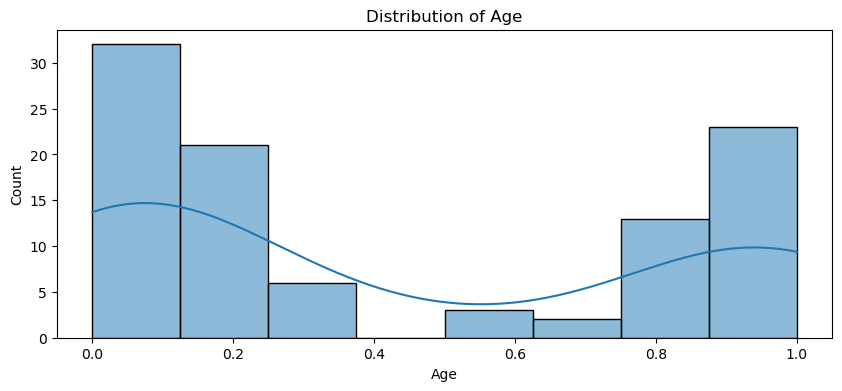

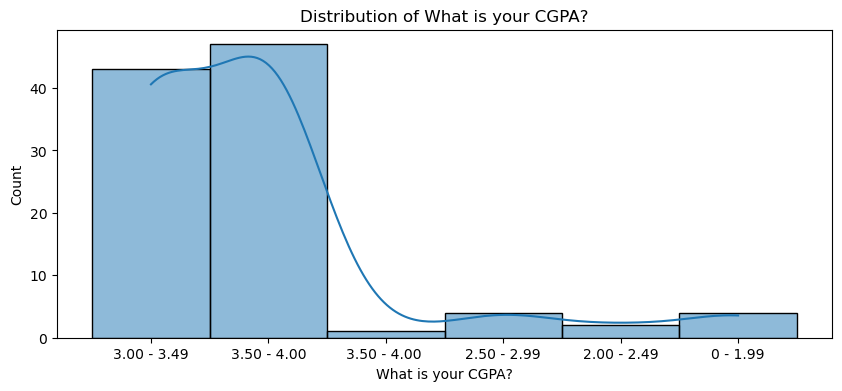

In [13]:
# Histograms for numerical columns
numerical_columns = ['Age', 'What is your CGPA?']  

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

**Checking for correlations between variables**

/tmp/ipykernel_32/1786644646.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


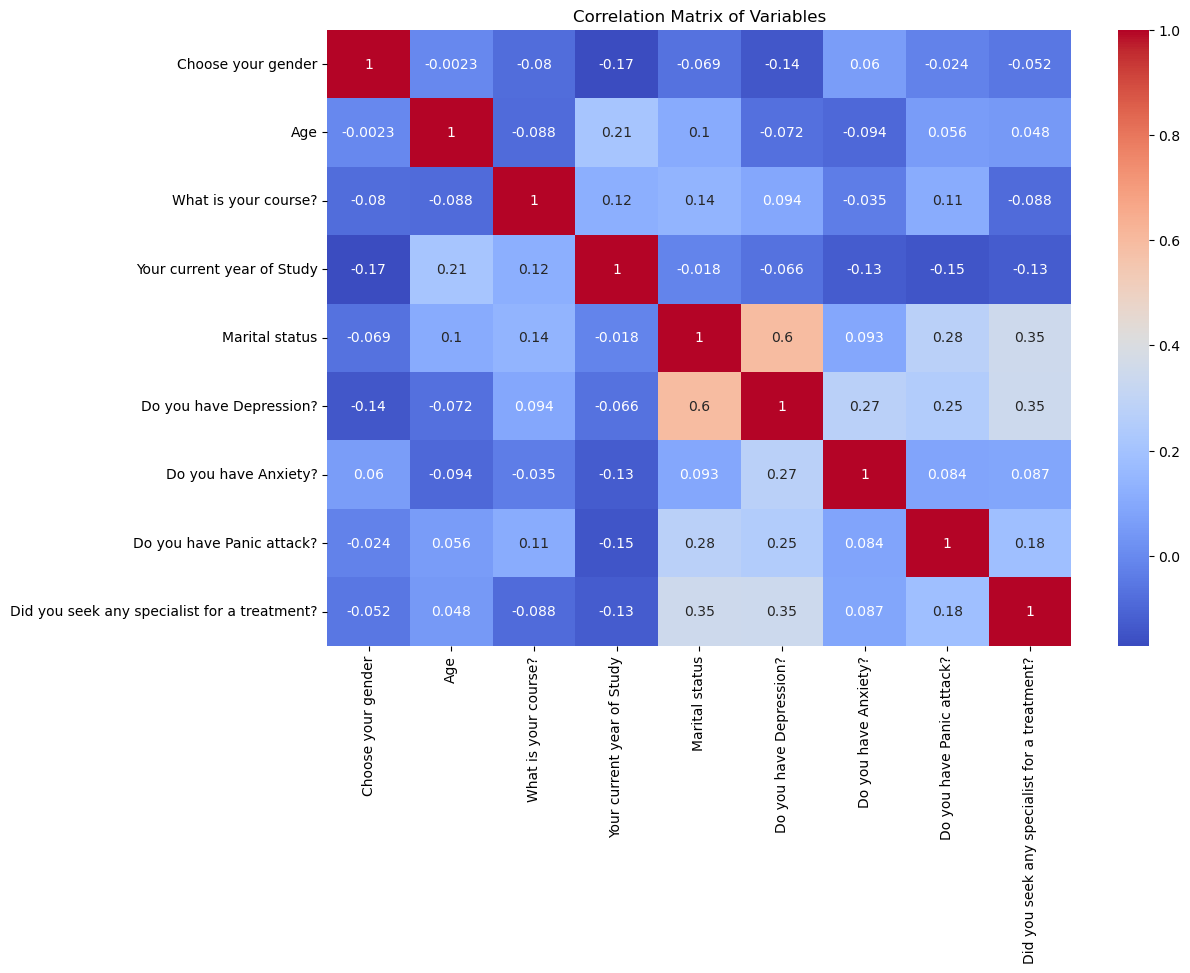

In [14]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Variables")
plt.show()

**Visualizing relationships between variables**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


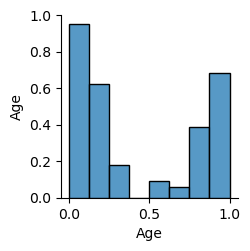

In [15]:
# Pairplot for numerical variables
numerical_columns = ['Age', 'What is your CGPA?']  
sns.pairplot(df[numerical_columns])
plt.show()

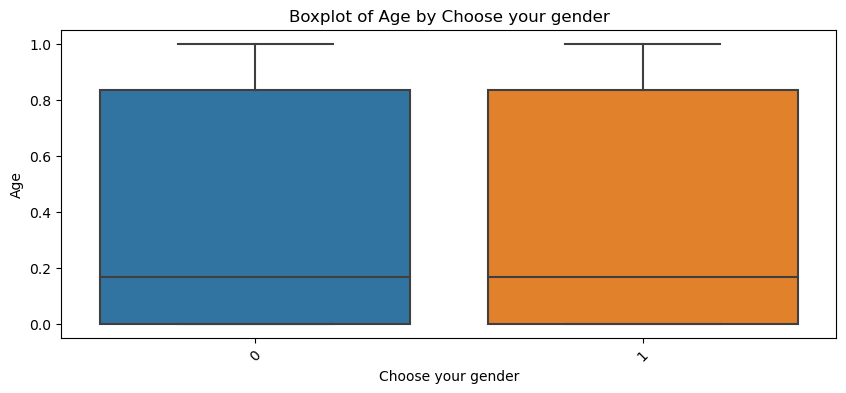

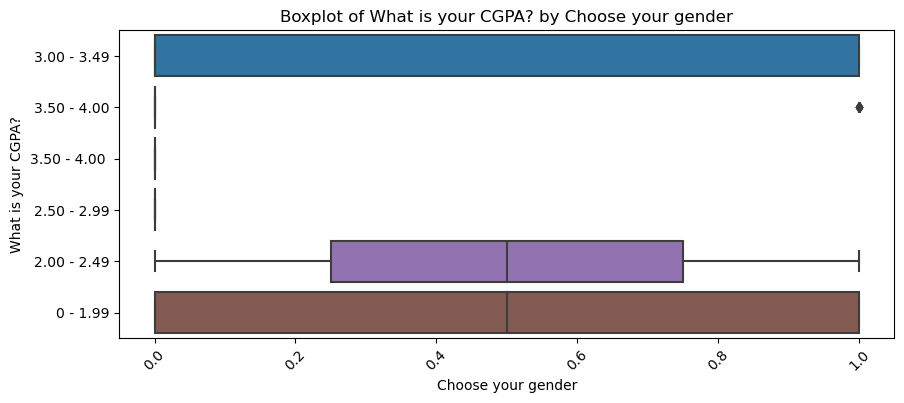

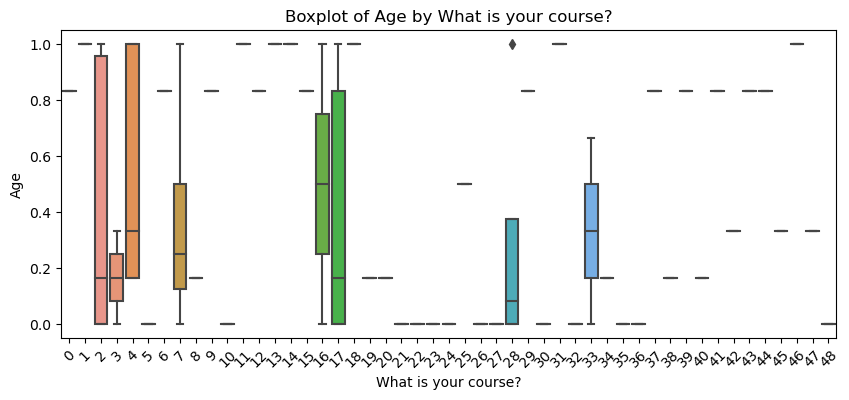

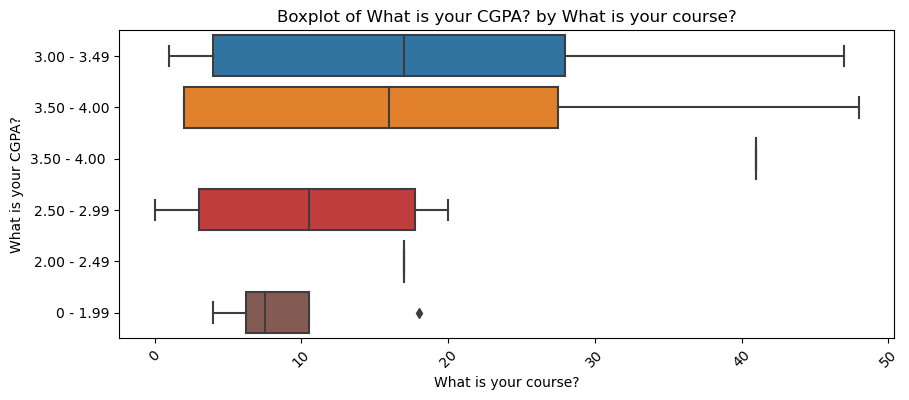

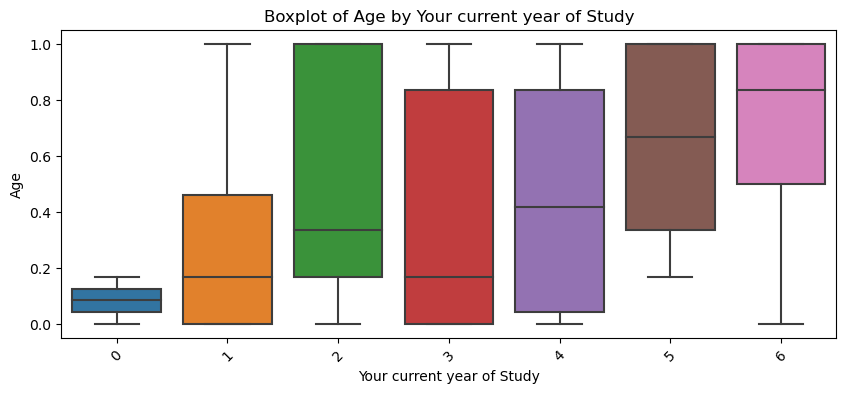

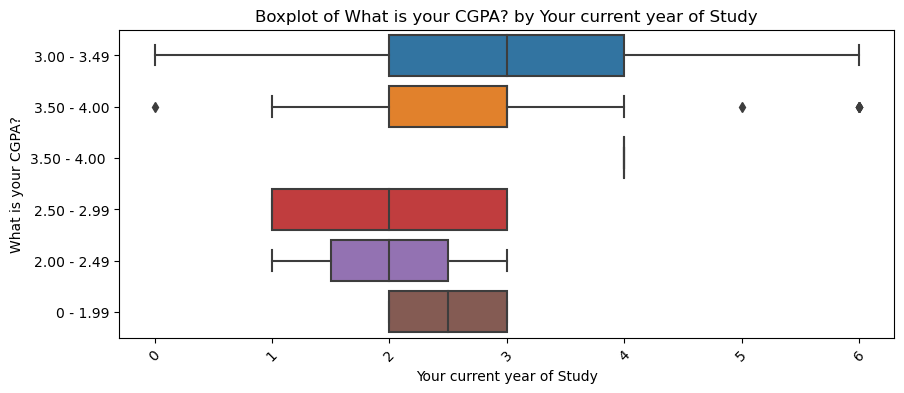

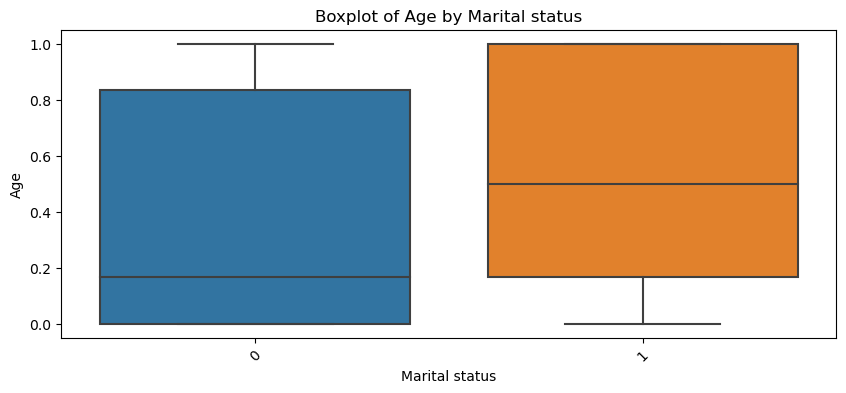

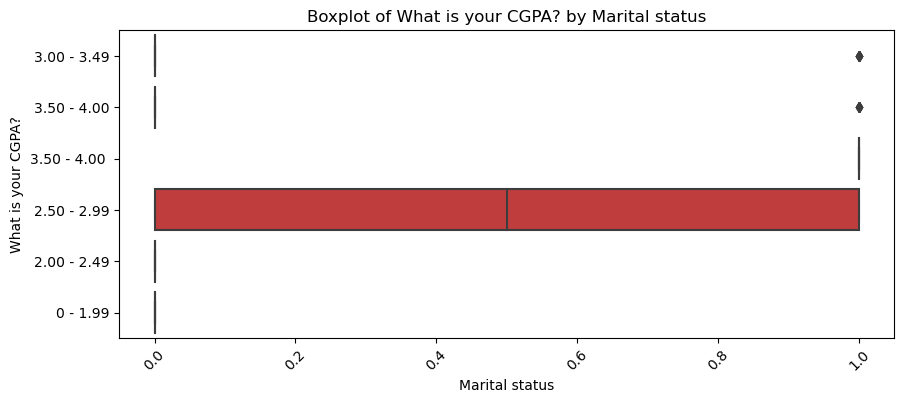

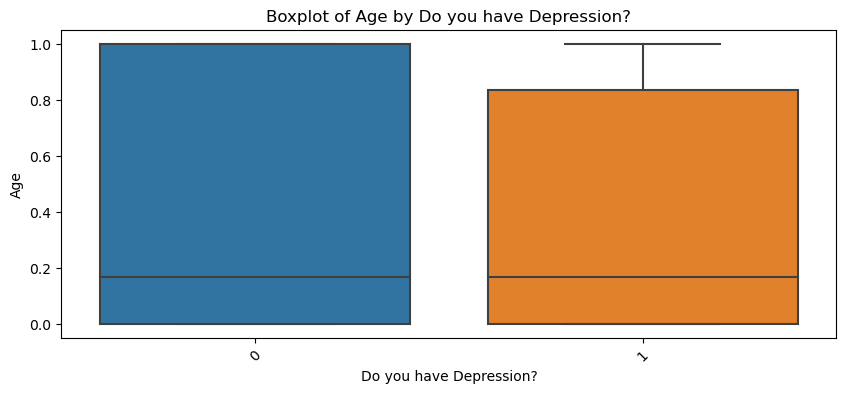

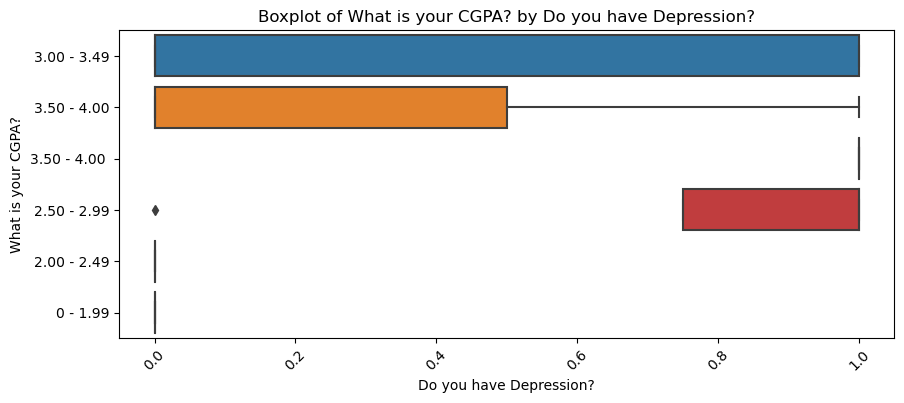

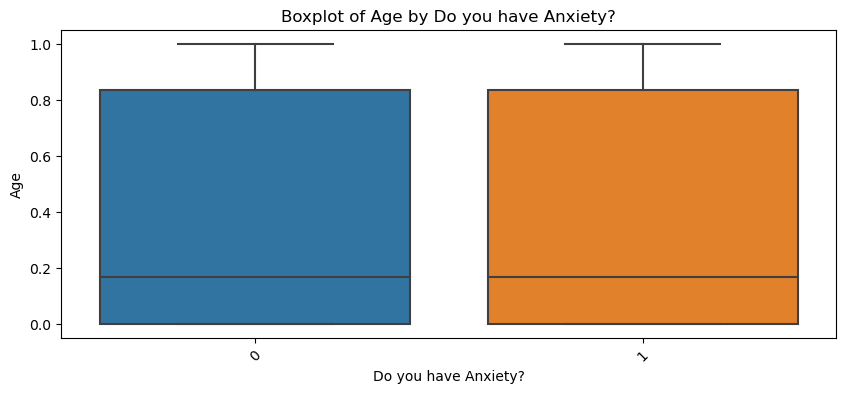

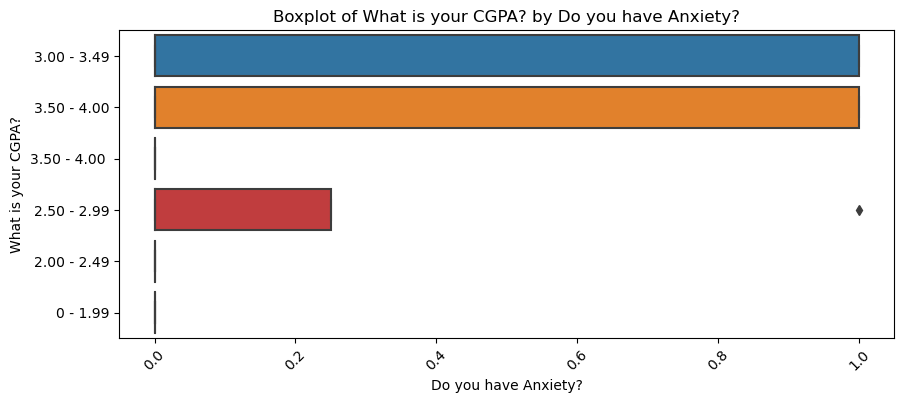

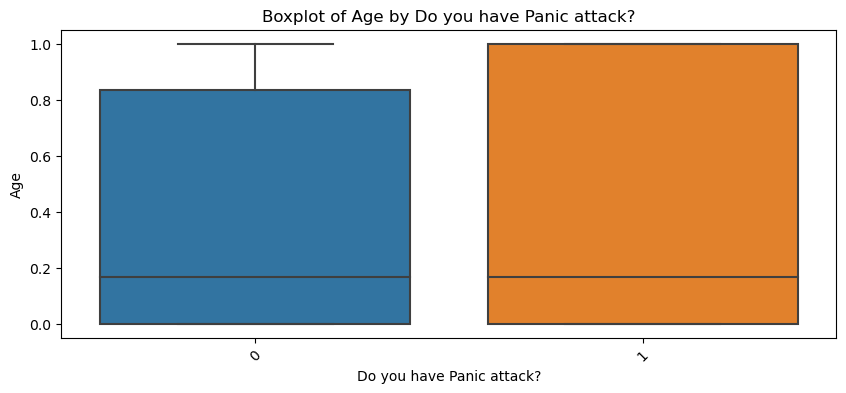

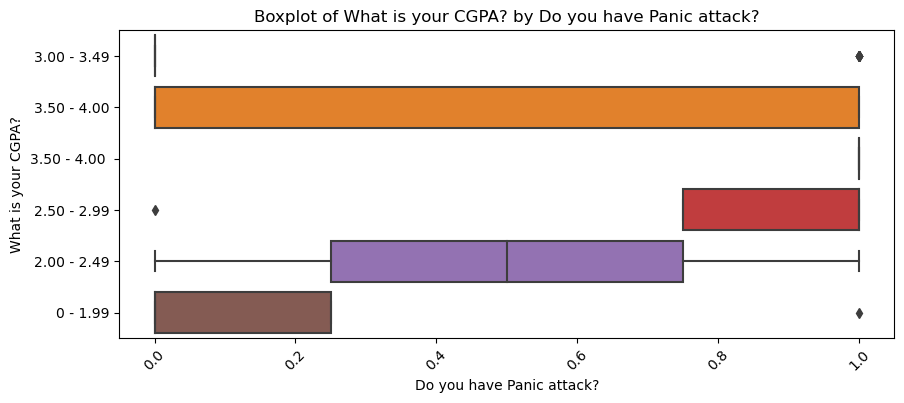

In [16]:
# Boxplots for numerical variables vs categorical variables
categorical_columns = ['Choose your gender', 'What is your course?', 'Your current year of Study', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']

for cat_column in categorical_columns:
    for num_column in numerical_columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(data=df, x=cat_column, y=num_column)
        plt.title(f"Boxplot of {num_column} by {cat_column}")
        plt.xticks(rotation=45)
        plt.show()

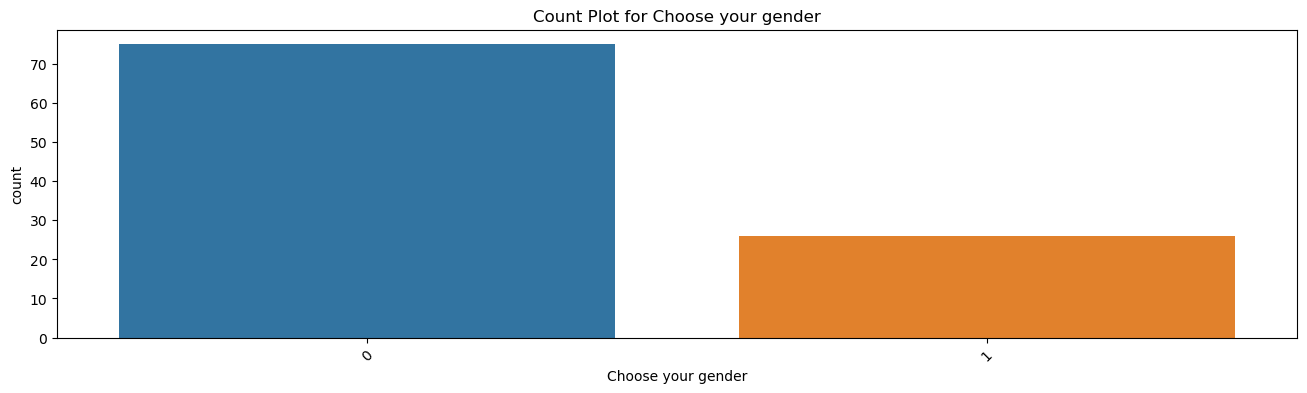

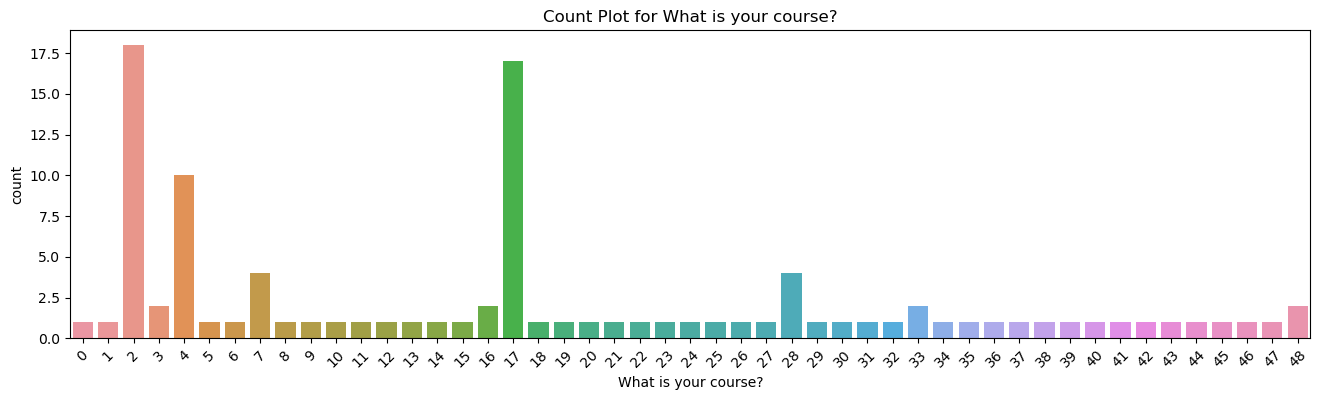

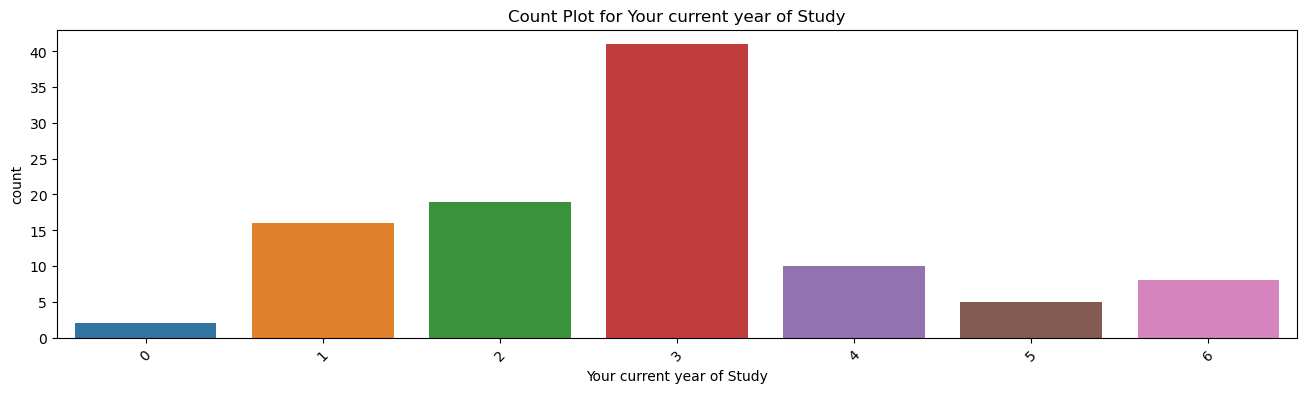

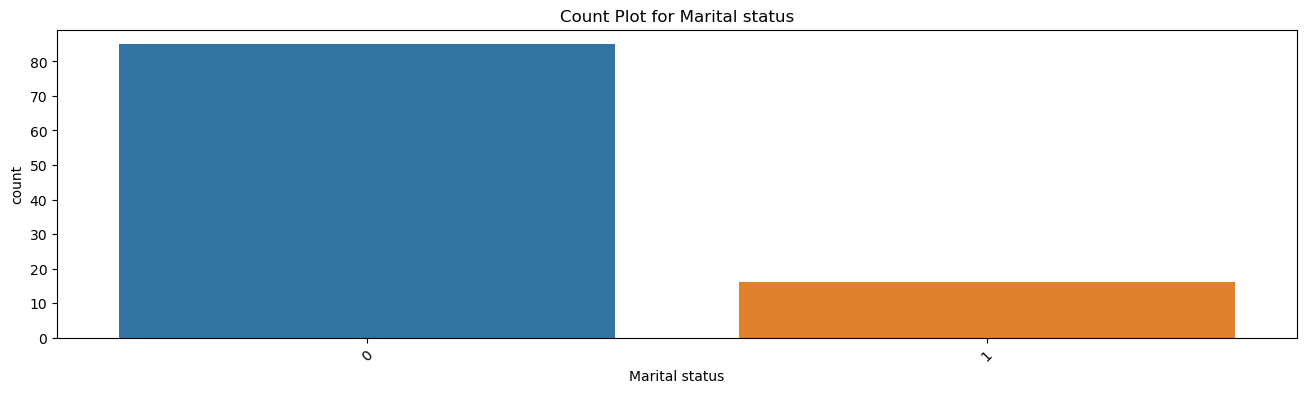

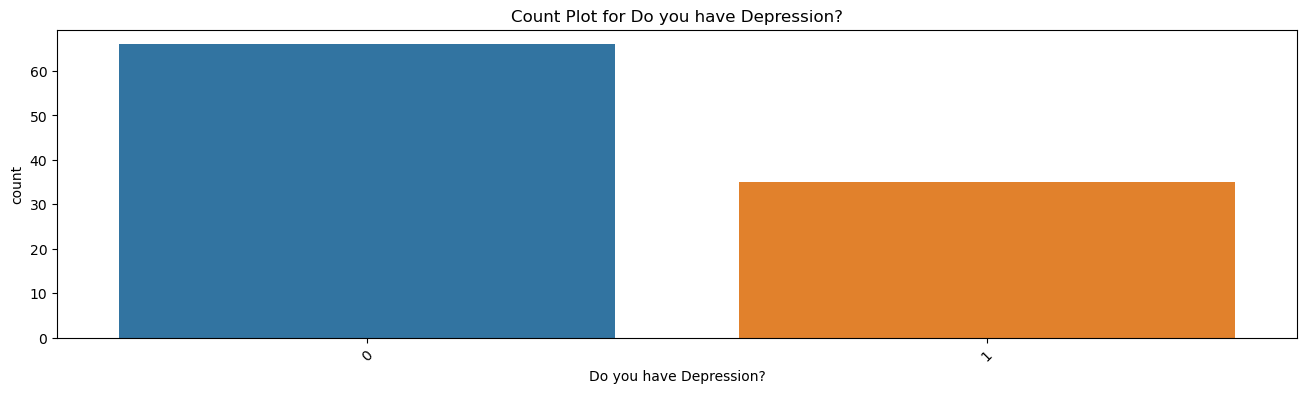

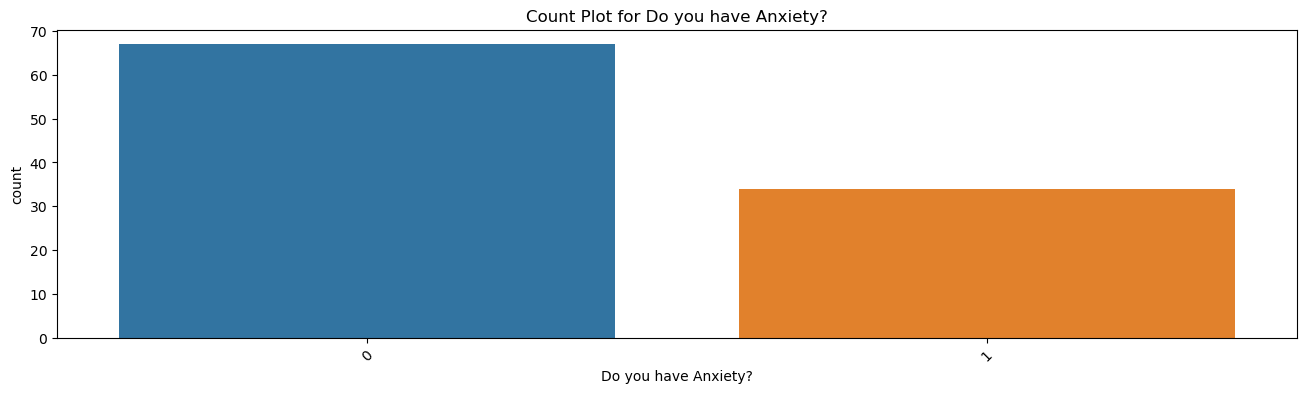

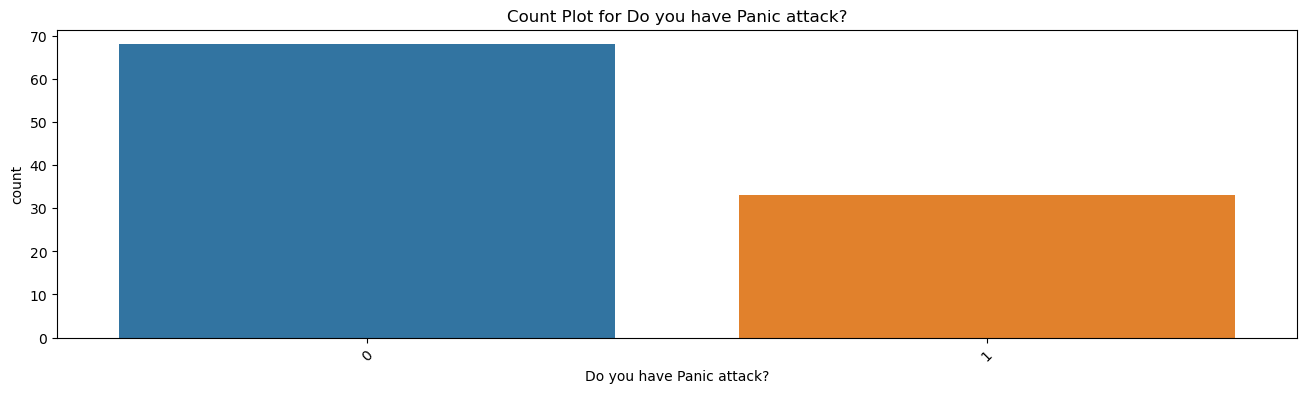

In [17]:
#Count plots for categorical columns
categorical_columns = ['Choose your gender', 'What is your course?', 'Your current year of Study', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']

for column in categorical_columns:
    plt.figure(figsize=(16, 4))
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot for {column}")
    plt.xticks(rotation=45)  
    plt.show()

# Feature Engineering

**Creating a new feature for total mental health issues**

In [18]:
# Create a new feature that counts the total number of mental health issues each student has
df['Total Mental Health Issues'] = df['Do you have Depression?'] + df['Do you have Anxiety?'] + df['Do you have Panic attack?']

**Creating a new feature for CGPA range**

In [19]:
df['CGPA Midpoint'] = df['What is your CGPA?'].map({
    '3.00 - 3.49': 3.25,
    '3.50 - 3.99': 3.75,
    '2.50 - 2.99': 2.75,
    '2.00 - 2.49': 2.25,
    '1.50 - 1.99': 1.75,
    '1.00 - 1.49': 1.25,
    '0.50 - 0.99': 0.75,
    '0.00 - 0.49': 0.25
})

df = df.drop('What is your CGPA?', axis=1)

**Creating a new feature for study year**

In [20]:
# Convert 'Your current year of Study' to a numerical value
df['Study Year'] = df['Your current year of Study'].map({
    'year 1': 1,
    'year 2': 2,
    'year 3': 3,
    'year 4': 4
    # Add more years if necessary
})

# Model Selection

**Importing necessary libraries**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Defining X and y**

In [22]:
# Define feature matrix X and target vector y
X = df.drop('Total Mental Health Issues', axis=1)
y = df['Total Mental Health Issues']

**Splitting the data into a training set and a test set**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Defining the models**

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Model Training

In [25]:
num_cols = ['Age']
cat_cols = ['Choose your gender', 'What is your course?', 'Your current year of Study', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

In [26]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median for numerical columns
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# Impute missing values with the most frequent category for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [27]:
# Impute missing values in the 'CGPA Midpoint' column with the median value
median_value = X_train['CGPA Midpoint'].median()
X_train['CGPA Midpoint'].fillna(median_value, inplace=True)
X_test['CGPA Midpoint'].fillna(median_value, inplace=True)

In [28]:
# Drop the 'Study Year' column from the training and test sets
X_train = X_train.drop('Study Year', axis=1)
X_test = X_test.drop('Study Year', axis=1)

In [29]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
# Define a function to calculate and print the evaluation metrics
def print_evaluation_metrics(y_test, y_pred, average='micro'):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average=average)}")
    print(f"Recall: {recall_score(y_test, y_pred, average=average)}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average=average)}")

In [32]:
# Train the models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Gradient Boosting...


In [33]:
# Predict the target variable for the test set using each model
for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_pred = model.predict(X_test)
    print_evaluation_metrics(y_test, y_pred)
    print("\n")

Model: Logistic Regression
Accuracy: 0.7619047619047619
Precision: 0.7619047619047619
Recall: 0.7619047619047619
F1 Score: 0.7619047619047619


Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Model: Random Forest
Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.9047619047619048


Model: Gradient Boosting
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0




# Model Deployment

In [34]:
# Import joblib
from joblib import dump

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model as a pickle file
dump(model, 'model.joblib')

['model.joblib']